# マルコフ連鎖モンテカルロ法 (MCMC)
前節では解析的に事後分布の計算をした．事後分布を近似的に推論する方法の1つに**マルコフ連鎖モンテカルロ法 (Markov chain Monte Carlo methods; MCMC)** がある．他の近似推論の手法としてはLaplace近似や変分推論（variational inference）などがある．MCMCは他の手法に比して，事後分布の推論だけでなく，確率分布を神経活動で表現する方法を提供するという利点がある．

```{note}
変分推論は入れた方がいいと思うが，紙幅の都合上いれられるか微妙である．
```

データを$X$とし，パラメータを$\theta$とする．

$$
p(\theta\mid X)=\frac{p(X\mid \theta)p(\theta)}{\int p(X\mid \theta)p(\theta)d\theta}
$$

分母の積分計算$\int p(X\mid \theta)p(\theta)d\theta$が求まればよい．

### モンテカルロ法

### マルコフ連鎖

## Metropolis-Hastings法

In [17]:
using Base: @kwdef
using Parameters: @unpack
using PyPlot, LinearAlgebra, Random, Distributions, ForwardDiff, KernelDensity
rc("axes.spines", top=false, right=false)
rc("font", family="Arial")

In [2]:
mixed_gauss = MixtureModel([MvNormal(zeros(2), I), MvNormal(3*ones(2), I)], [0.5, 0.5]) # 分布を混ぜる

MixtureModel{IsoNormal}(K = 2)
components[1] (prior = 0.5000): IsoNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.0 0.0; 0.0 1.0]
)

components[2] (prior = 0.5000): IsoNormal(
dim: 2
μ: [3.0, 3.0]
Σ: [1.0 0.0; 0.0 1.0]
)



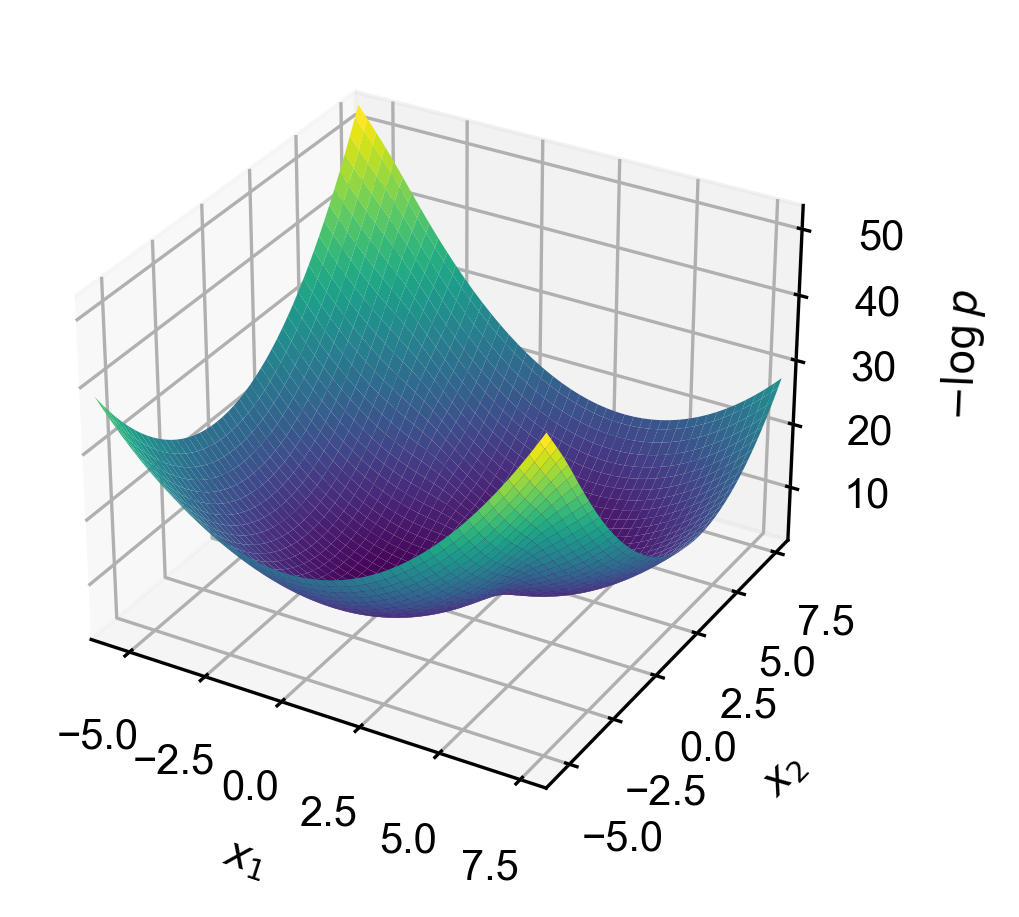

In [21]:
x = -6:0.1:8
pd(x₁, x₂) = logpdf(mixed_gauss, [x₁, x₂])

mixed_gauss_heat = pd.(x, x');

xpos = x * ones(size(x))'

fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.add_subplot(projection="3d")
surf = ax.plot_surface(xpos, xpos', -mixed_gauss_heat, cmap="viridis")
ax.set_xlim(-6, 8); ax.set_ylim(-6, 8); 
ax.set_xlabel(L"$x_1$"); ax.set_ylabel(L"$x_2$"); ax.set_zlabel(L"$-\log p$"); 
tight_layout()

In [4]:
log_p(θ) = logpdf(mixed_gauss, θ);
grad(θ)= ForwardDiff.gradient(log_p, θ)

grad (generic function with 1 method)

## ランジュバン・モンテカルロ法 (LMC)
http://watanabe-www.math.dis.titech.ac.jp/~kohashi/document/bayes_51.pdf

https://qiita.com/karadaharu/items/6c015ec99f30667808f2

https://en.wikipedia.org/wiki/Metropolis-adjusted_Langevin_algorithm

拡散過程

$$
{\frac{d\theta}{dt}}=\nabla \log p (\theta)+{\sqrt 2}{d{W}}
$$

Euler–Maruyama法により，

In [5]:
nt = 100
ϵ = 0.1
β = 1

1

In [6]:
θgd = zeros(nt, 2)
θ = [-5, 5]
θgd[1, :] = θ
for t in 1:nt-1
    θ += ϵ * β * grad(θ) #+ ρ * randn(2)
    θgd[t+1, :] = θ
end

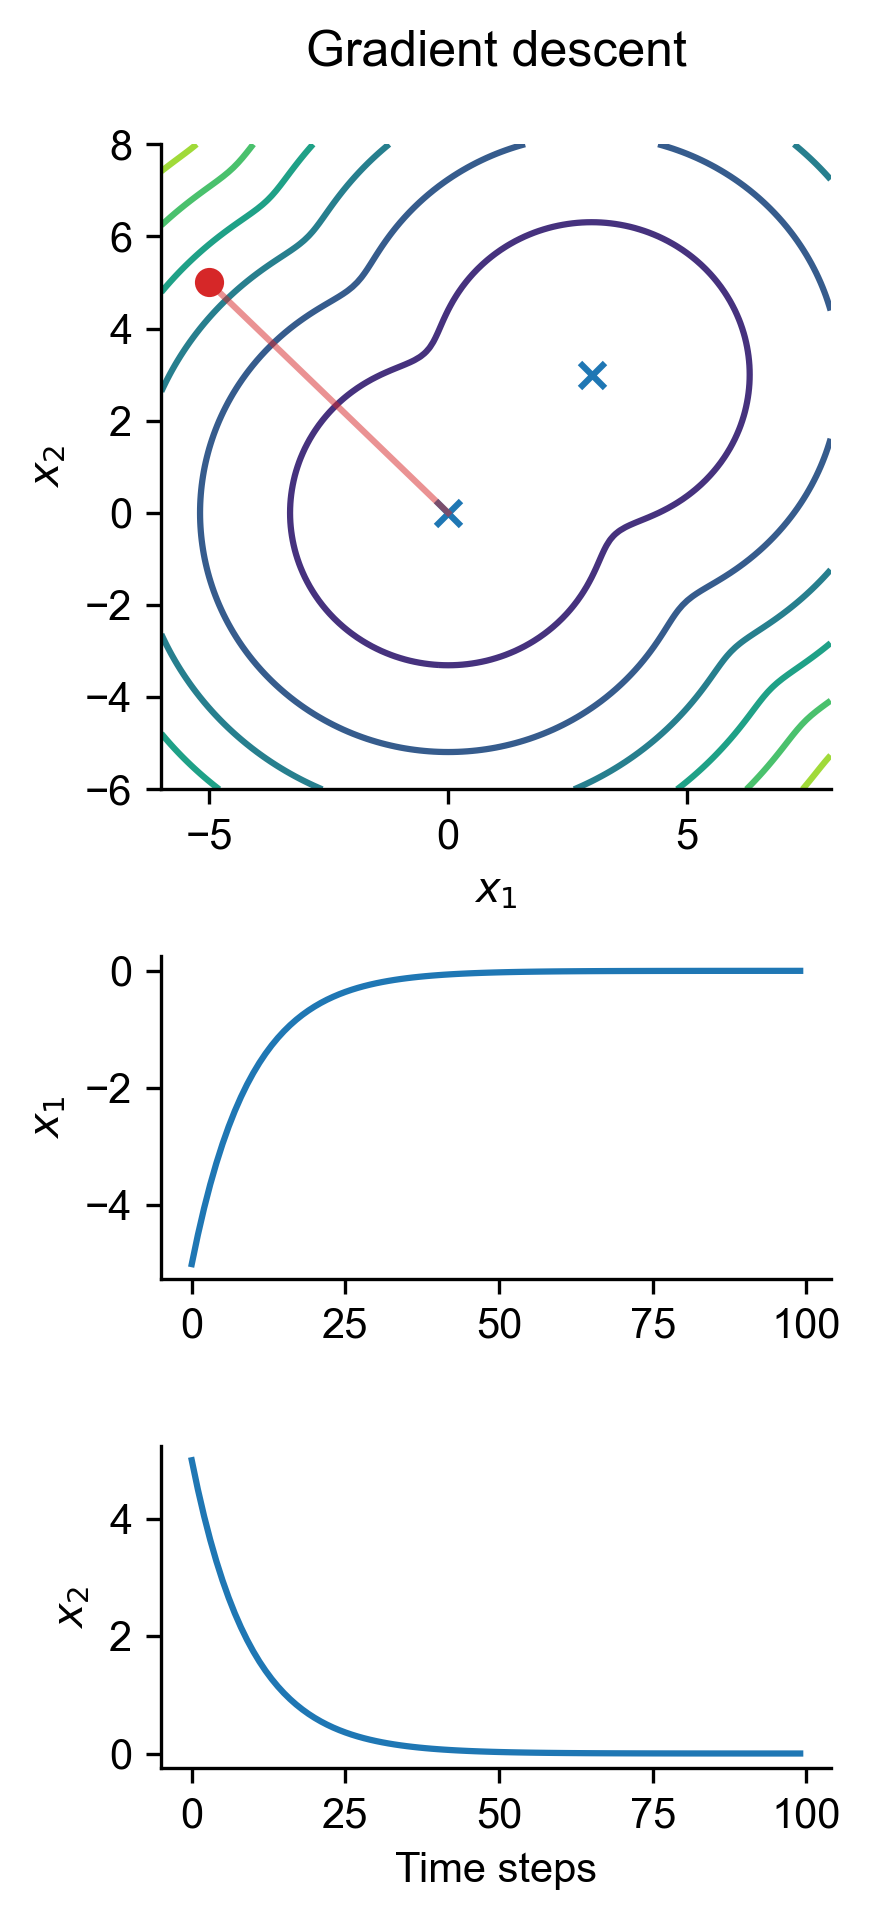

In [22]:
fig, ax = subplots(3, 1, figsize=(3, 6.5), gridspec_kw=Dict("height_ratios" => [2,1,1]), dpi=300)
ax[1].set_title("Gradient descent\n ")
ax[1].contour(x, x, -mixed_gauss_heat)
ax[1].plot(θgd[:, 1], θgd[:, 2], color="tab:red", alpha=0.5)
ax[1].scatter([0,3], [0,3], marker="x")
ax[1].scatter([-5,],[5,], marker="o",color="tab:red")
ax[1].set_xlabel(L"$x_1$"); ax[1].set_ylabel(L"$x_2$")
ax[1].set_xlim(-6,8); ax[1].set_ylim(-6,8)
ax[2].plot(θgd[:, 1])
ax[3].plot(θgd[:, 2])
ax[2].set_ylabel(L"$x_1$")
ax[3].set_ylabel(L"$x_2$")
ax[3].set_xlabel("Time steps");
fig.tight_layout()

In [8]:
nt = 500
ϵ = 0.25

0.25

In [9]:
β = 1
ρ = sqrt(2*ϵ);

In [10]:
θl = zeros(nt, 2)
θ = [-5, 5]
θl[1, :] = θ
for t in 1:nt-1
    θ += ϵ * β * grad(θ) + ρ * randn(2)
    θl[t+1, :] = θ
end

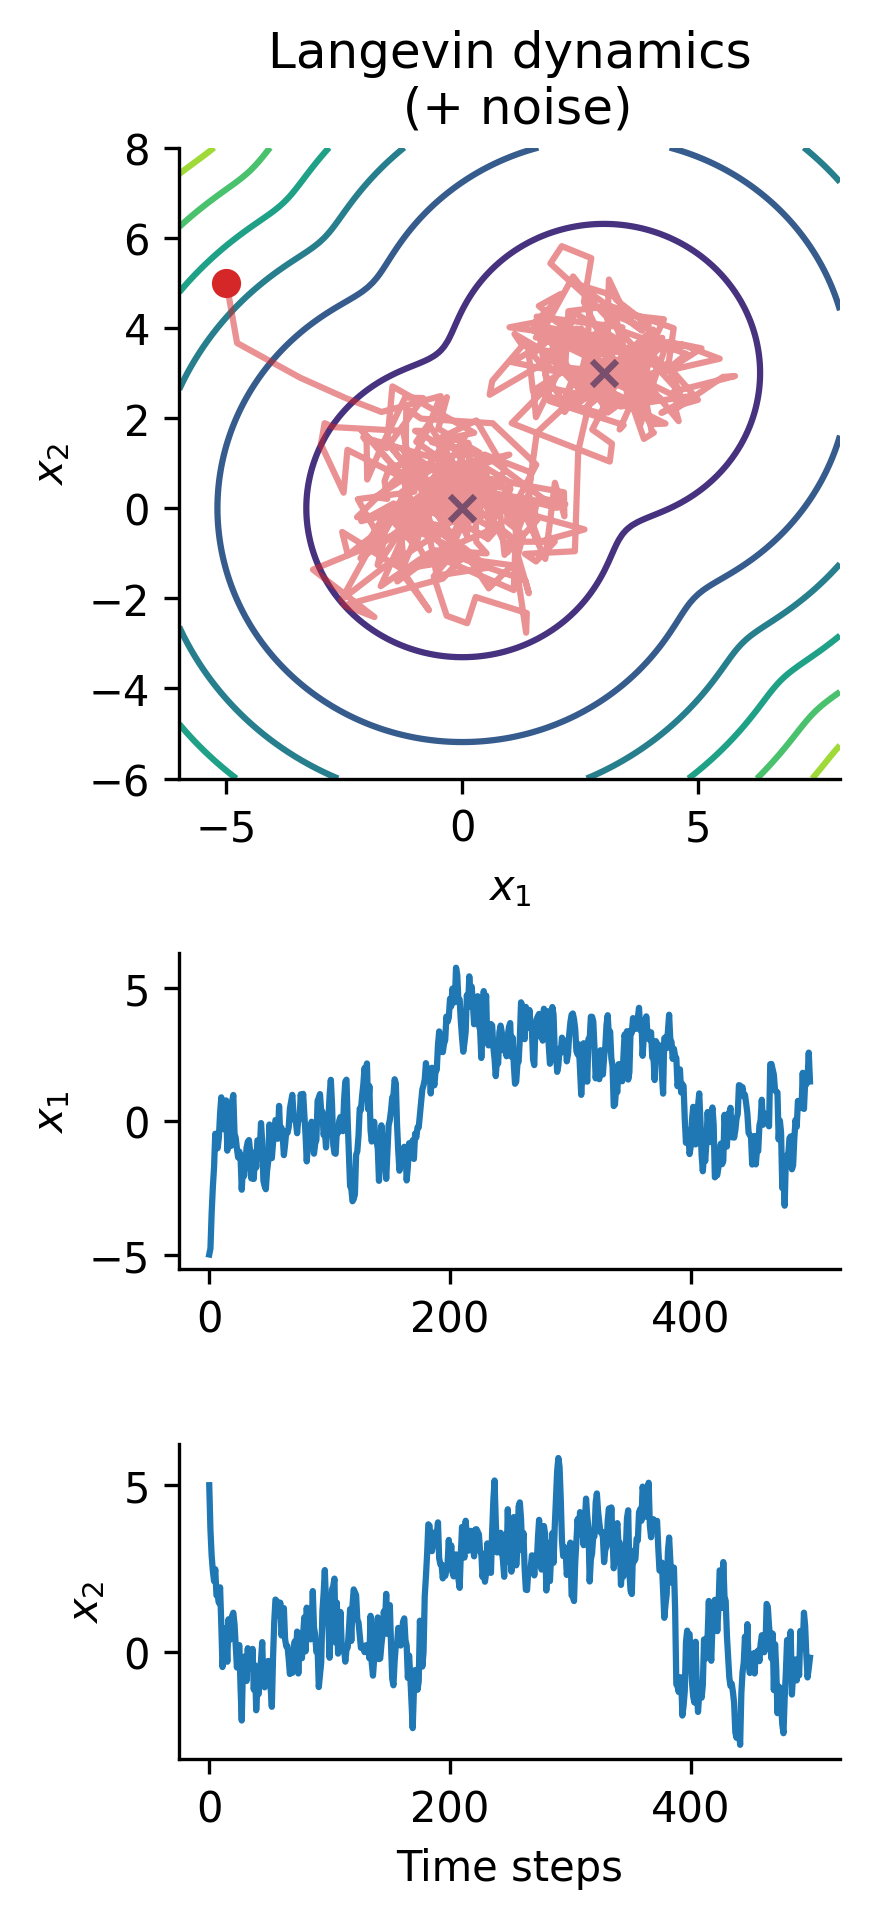

In [11]:
fig, ax = subplots(3, 1, figsize=(3, 6.5), gridspec_kw=Dict("height_ratios" => [2,1,1]), dpi=300)
ax[1].set_title("Langevin dynamics\n (+ noise)")
ax[1].contour(x, x, -mixed_gauss_heat)
ax[1].plot(θl[:, 1], θl[:, 2], color="tab:red", alpha=0.5)
ax[1].scatter([0,3], [0,3], marker="x")
ax[1].scatter([-5,],[5,], marker="o",color="tab:red")
ax[1].set_xlabel(L"$x_1$"); ax[1].set_ylabel(L"$x_2$")
ax[1].set_xlim(-6,8); ax[1].set_ylim(-6,8)
ax[2].plot(θl[:, 1])
ax[3].plot(θl[:, 2])
ax[2].set_ylabel(L"$x_1$")
ax[3].set_ylabel(L"$x_2$")
ax[3].set_xlabel("Time steps");
fig.tight_layout()

## ハミルトニアン・モンテカルロ法 (HMC法)
ハミルトニアン・モンテカルロ法(Hamiltonian Monte Calro)あるいはハイブリッド・モンテカルロ法(Hybrid Monte Calro)という

一般化座標を$\mathbf{q}$, 一般化運動量を$\mathbf{p}$とする．ポテンシャルエネルギーを$U(\mathbf{q})$としたとき，古典力学（解析力学）において保存力のみが作用する場合の**ハミルトニアン (Hamiltonian)** $\mathcal{H}(\mathbf{q}, \mathbf{p})$は

$$
\mathcal{H}(\mathbf{q}, \mathbf{p}):=U(\mathbf{q})+\frac{1}{2}\|\mathbf{p}\|^2
$$

となる．このとき，次の2つの方程式が成り立つ．

$$
\frac{d\mathbf{q}}{dt}=\frac{\partial \mathcal{H}}{\partial \mathbf{p}}=\mathbf{p},\quad\frac{d\mathbf{p}}{dt}=-\frac{\partial \mathcal{H}}{\partial \mathbf{q}}=-\frac{\partial U}{\partial \mathbf{q}}
$$

これを**ハミルトンの運動方程式(hamilton's equations of motion)** あるいは**正準方程式 (canonical equations)** という．


この処理をMetropolis-Hastings法における採用・不採用アルゴリズムという．

リープフロッグ(leap frog)法により離散化する．

In [12]:
nt = 500
ϵ = 0.25

0.25

In [13]:
ps = zeros(nt, 2)
θs = zeros(nt, 2)
p = randn(2)
θ = [-5,5]#randn(2)
ps[1, :] = copy(p)
θs[1, :] = copy(θ)
for t in 2:nt
    if t in 10:15:nt
        p = randn(2)
    end
    p += 0.5 * ϵ * grad(θ)
    θ += ϵ * p
    p += 0.5 * ϵ * grad(θ)
    ps[t, :] = p
    θs[t, :] = θ
end

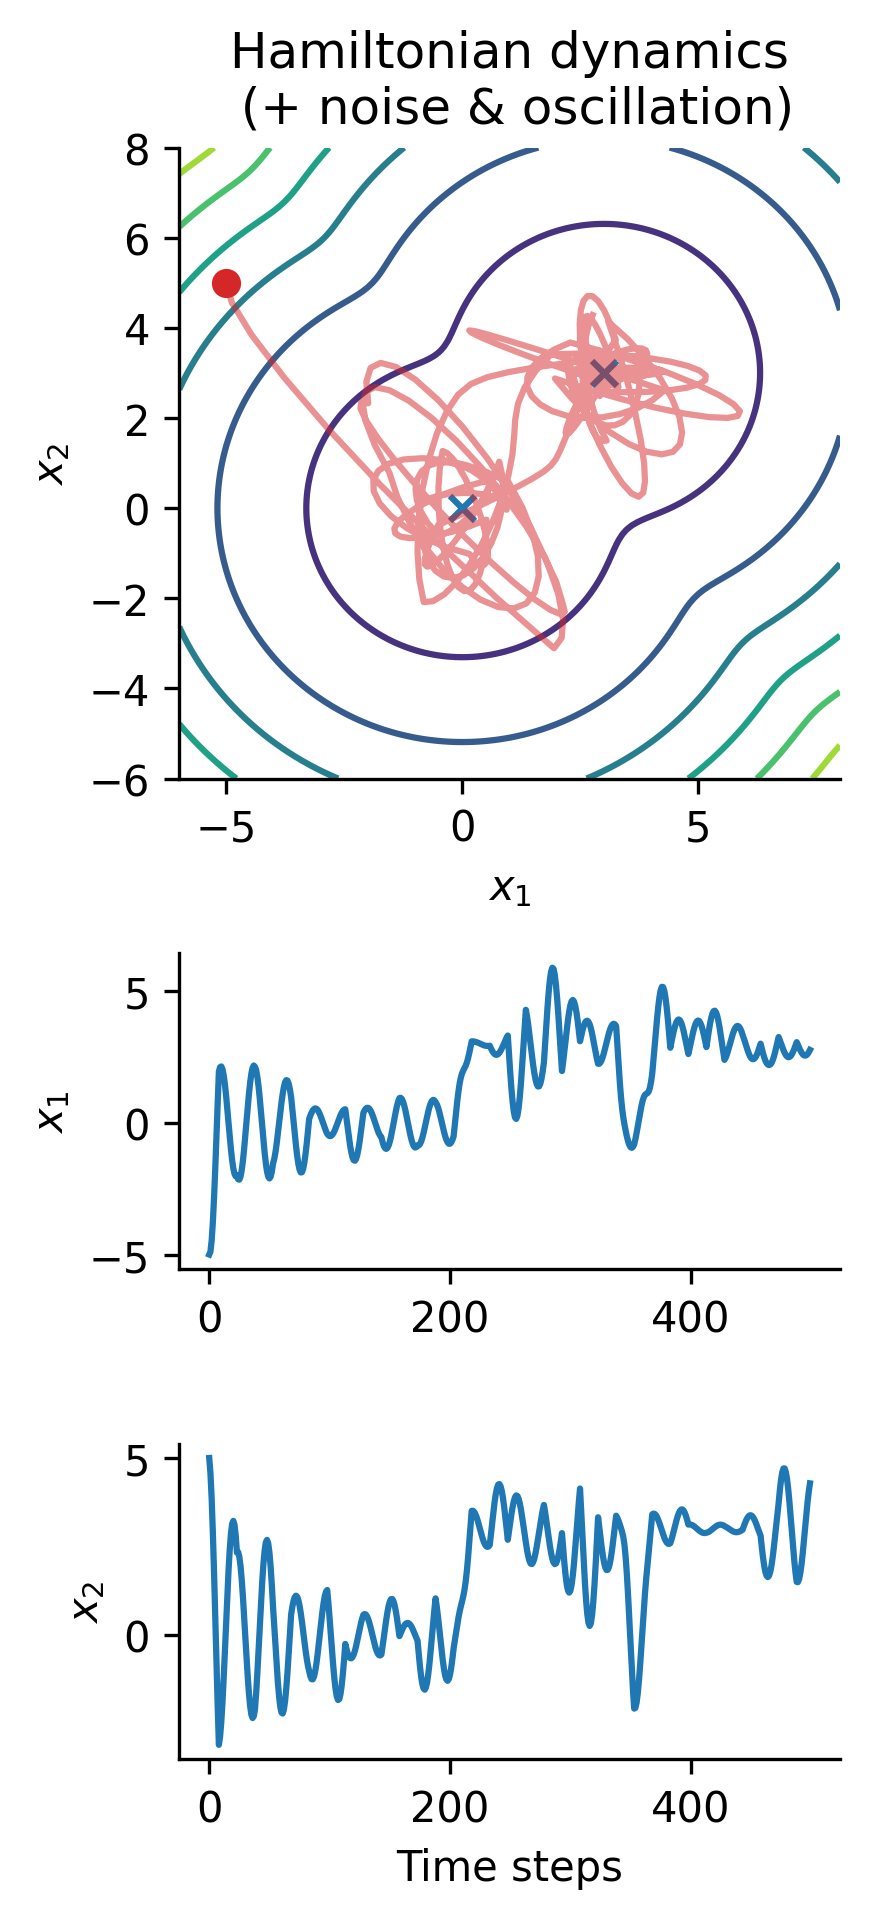

In [14]:
fig, ax = subplots(3, 1, figsize=(3, 6.5), gridspec_kw=Dict("height_ratios" => [2,1,1]), dpi=300)
ax[1].set_title("Hamiltonian dynamics\n (+ noise & oscillation)")
ax[1].contour(x, x, -mixed_gauss_heat)
ax[1].scatter([0,3], [0,3], marker="x")
ax[1].scatter([-5,],[5,], marker="o",color="tab:red")
ax[1].plot(θs[:, 1], θs[:, 2], color="tab:red", alpha=0.5)
ax[1].set_xlabel(L"$x_1$"); ax[1].set_ylabel(L"$x_2$")
ax[1].set_xlim(-6,8); ax[1].set_ylim(-6,8)
ax[2].plot(θs[:, 1])
ax[3].plot(θs[:, 2])
ax[2].set_ylabel(L"$x_1$")
ax[3].set_ylabel(L"$x_2$")
ax[3].set_xlabel("Time steps");
fig.tight_layout()

*ToDo: 自己相関確認する*